# Colab's New Code Editor

Colab is moving to a new code editor which includes:
* Richer completions
* Additional keybinding options
* Improved accessibility

## Enabling and disabling the new editor

The new editor can be controlled with the experiment button in the top-right.

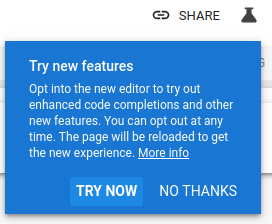
### Issues
You can disable the new editor if you run into issues, but please do let us know why so that we can fix any complaints.

Bugs can be filed at https://github.com/googlecolab/colabtools/issues/new, or use the 'Send feedback...' option in the Help menu.

In [0]:
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import random

from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [7]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [0]:
import json
token ={"username":"mrajamani","key":"e4e60b18ece3386d5cfd0f693d510857"}
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [12]:
!cp /root/.kaggle/kaggle.json ~/.kaggle/kaggle.json

cp: '/root/.kaggle/kaggle.json' and '/root/.kaggle/kaggle.json' are the same file


In [7]:
!kaggle config set -n path -v{/root}

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 6, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [8]:
!chmod 600 /root/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [28]:
!kaggle datasets list -s credit

ref                                                    title                                                size  lastUpdated          downloadCount  
-----------------------------------------------------  -------------------------------------------------  ------  -------------------  -------------  
mlg-ulb/creditcardfraud                                Credit Card Fraud Detection                          66MB  2018-03-23 01:17:27         158799  
uciml/german-credit                                    German Credit Risk                                   11KB  2016-12-14 21:25:02          10705  
uciml/default-of-credit-card-clients-dataset           Default of Credit Card Clients Dataset             1001KB  2016-11-03 03:39:18          22535  
arjunbhasin2013/ccdata                                 Credit Card Dataset for Clustering                  340KB  2018-03-02 08:35:03           5997  
dansbecker/aer-credit-card-data                        Credit Card Data from book "Econometric

In [15]:
!kaggle datasets download -d  mlg-ulb/creditcardfraud -p /root/.kaggle/

 97% 64.0M/66.0M [00:01<00:00, 30.0MB/s]
100% 66.0M/66.0M [00:01<00:00, 42.8MB/s]


In [16]:
!unzip /root/.kaggle/*.zip

Archive:  /root/.kaggle/creditcardfraud.zip
  inflating: creditcard.csv          


In [17]:
df = pd.read_csv('creditcard.csv', low_memory = False)
df = df.sample(frac = 1).reset_index(drop = True)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,132656.0,-0.324151,0.518018,1.721372,-0.417024,-0.020874,-0.002549,0.364396,0.006381,0.491950,-0.265011,0.783195,0.813273,0.122747,-0.333522,-0.311786,-0.157063,-0.674144,0.797512,0.299059,0.154022,0.307635,1.374801,-0.305754,0.063447,-0.293607,-0.154518,0.291182,0.008953,7.62,0
1,22031.0,-1.328592,-0.668176,3.174040,0.073075,0.010124,0.862754,-0.341060,-0.143875,1.645276,0.008857,-1.326832,-2.285344,2.588594,-0.604906,-3.041777,-1.921770,0.543747,1.478040,-0.917353,-0.207517,-0.771367,-0.687523,-0.370011,-0.508537,0.596779,-0.399151,-0.090179,-0.235158,70.00,0
2,154350.0,-0.639270,0.512418,0.198686,-1.516497,2.415173,4.072233,-0.218389,1.058348,0.225682,-0.659957,-0.187986,0.061611,-0.185411,0.039206,1.009903,-0.135749,-0.506722,-0.103035,0.253376,-0.020434,-0.089141,-0.391339,-0.023428,0.663127,-0.310679,-0.534921,-0.098551,0.152240,4.99,0
3,47631.0,-3.672267,-2.146067,-1.937376,-1.037980,4.080319,1.393414,-1.938166,1.697201,-0.027119,-0.383696,-0.803584,0.459892,0.024392,0.847522,-0.259510,0.517921,-0.365989,-0.197986,0.091798,-0.123082,-0.046414,-0.402708,-1.162296,1.210968,-0.521715,0.842598,0.778617,-0.739970,2.00,0
4,40707.0,1.401412,-0.323197,0.608667,-0.676899,-0.972389,-0.990968,-0.433772,-0.287976,-1.018066,0.555126,0.092358,0.360618,1.865805,-0.499454,0.599689,1.146679,0.130056,-1.790392,0.607231,0.182436,-0.076249,-0.261673,0.111024,0.412947,0.288866,-0.485821,0.021031,0.026849,12.00,0


**Fraud Detection**

Our Task:

- Explore the dataset/Visualize
- Decide which feature are important
- Perform machine learning
- Test the model on the testing set





In [18]:
fraud = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
print(len(fraud))
print(len(non_frauds))

492
284315


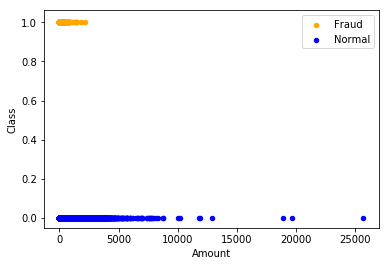

In [19]:
ax = fraud.plot.scatter(x = 'Amount', y ='Class', color = 'Orange', label = 'Fraud')
non_frauds.plot.scatter(x = 'Amount', y = 'Class', color = 'Blue', label = 'Normal', ax = ax)
plt.show()

In [0]:
x = df.iloc[:,:-1]
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = .35)

In [24]:
logistic = linear_model.LogisticRegression(C = 1e5)
logistic.fit(X_train, y_train)
print('Score:', logistic.score(X_test, y_test))


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score: 0.9986958658948868


In [25]:
y_predicted = np.array(logistic.predict(X_test))
print(y_predicted)

[0 0 0 ... 0 0 0]


# Richer syntax highlighting

Improved support for nested languages:

```notebook-python
df = pd.io.gbq.read_gbq('''
  SELECT 
    REGEXP_EXTRACT(name, '[a-zA-Z]+'),
    SUM(number) as count
  FROM `bigquery-public-data.usa_names.usa_1910_2013`
  WHERE state = 'TX'
  GROUP BY name
  ORDER BY count DESC
  LIMIT 100
''')
```